In [143]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

___________
## **Disclaimer**

This notebook is a documentation of data exploration and used for testing different data transformations and methods for measuring baseline engagement and virality. It is not curated to be a template for replicating the data exploration process. 

#### **Final Decisions**

- *Data Transformation*: Square Root transformation with Z-Score Noremalization
- *Baseline*: Method 3, N consecutive posts within 2 standard deviations of the mean profile engagement
- *Virality*: Method 2, Over 3 standard deviations from mean profile engagement

The final output of all three decisions can be seen in the final plot at the bottom of this notebook.
___________

This document will evaluate what is the best way to measure baseline engagement levels and virality. The objective is to find a method for evaluating baseline engagement levels along with virality that balances the number of valid observations for the causal analysis, while also maintaining an accurate representation for each of the metrics. For example, requiring only 2 consecutive posts to establish a "baseline" will maximize the number of baselines available for use in the dataset, but it does now accurately represent a "baseline engagement level" for the social media profile. Alternatively, requiring 50 consecutive posts for a baseline may not be realistic and there may be very few observations in the entire dataset with 50 consecutive posts that fall within same engagement range. Determining the best method for both Baseline and Virality should also consider the number of different companies that can provide observations. Ideally the number of companies that have baseline and virality observations should be maximized.

The following methods will be evaluated for determining baseline engagement levels.

Baseline Engagement Levels: 
- **B-Method 1**: Engagement remains within +-X percentage of N Post moving average for D Posts.
    - *X Percentage*: [10%, 20%, 50%, 80%, 100%]
    - *N Post Moving Average*: [20 post, 50 post, 100 post, 150 post]
    - *D Posts*: [5 post, 10 post, 20 post, 30 post, 40 post]
- **B-Method 2**: Rate of change in engagement remains lower than Y% of total engagement for M consecutive Posts.
    - *Y% of Total Engagement* [5%, 10%, 20$, 30%, 50%]
    - *M Consecutive Posts*: [5 post, 10 post, 20 post, 30 post, 40 post]
- **B-Method 3**: Engagement remains below 2 standard deviations for N consecutive posts
    - *N day Moving Average*: [5 post, 10 post, 20 post, 30 post, 40 post]

Virality:
- **V-Method 1**: W times the Baseline
    - *W times BMA*: [3x, 5x, 10x, 20x]
- **V-Method 2**: S standard deviations beyond the Baseline
    - *S standard deviations*: [2, 3]

Additionally, due to the highly biased distribution of social media engagement data, various data transformations are attempted including:

- Log Transformation
- Square Root Transformation
- Z-Scale Normalization

_______
#### 1. Prepare Data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

In [144]:
def metrics_prep(file_path):
    df = pd.read_csv(file_path, 
                    index_col=False,
                    sep=",")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)

    metrics = df[['Date','Engagement']]
    return metrics, df

In [145]:
file_path = "data/Posts_pomelofashion_24_Apr_2023_23_Apr_2024_6335.csv"
orig_data, df = metrics_prep(file_path)
metrics = orig_data.copy()

In [ ]:
#Explore Full Dataframe for One Compay
df.head()

#### 2.1 Plot Engagement Data per Post

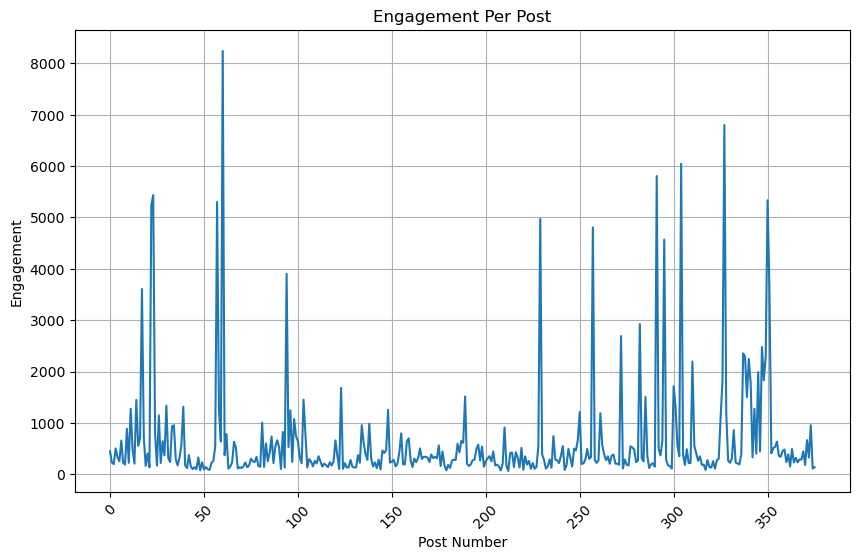

In [24]:
import matplotlib.pyplot as plt
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot( metrics['Engagement'], linestyle='-', marker='')  # No marker for dots

# Customize the plot
plt.title('Engagement Per Post')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)  # Rotate date labels

# Show the plot
plt.grid(True)
plt.show()

#### 2.2 Plot Distribution of Engagement Data

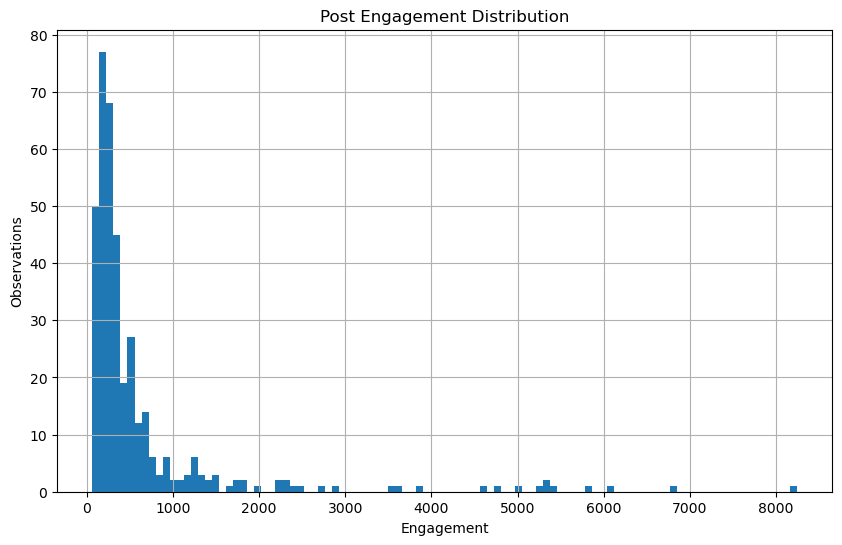

In [25]:
import matplotlib.pyplot as plt
# Create a plot
plt.figure(figsize=(10, 6))
plt.hist( metrics['Engagement'], bins=100)  # No marker for dots

# Customize the plot
plt.title('Post Engagement Distribution')
plt.xlabel('Engagement')
plt.ylabel('Observations')

# Show the plot
plt.grid(True)
plt.show()

#### 2.3 Logarithmic Transformation of Engagement Data

In [26]:
metrics['log_engagement'] = np.log(metrics['Engagement'])
metrics['sqrt_engagement'] = np.sqrt(metrics['Engagement'])

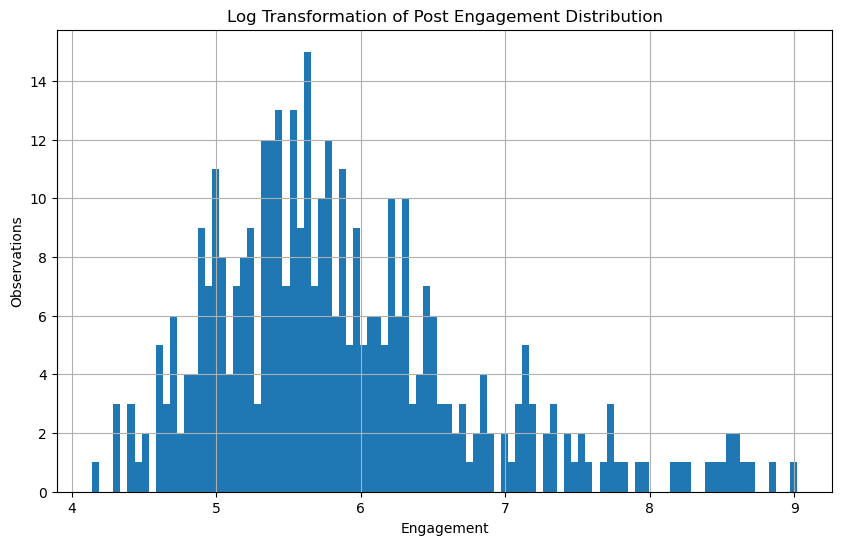

In [27]:
metrics['log_engagement'] = np.log(metrics['Engagement'])

plt.figure(figsize=(10, 6))
plt.hist( metrics['log_engagement'], bins=100)  # No marker for dots

# Customize the plot
plt.title('Log Transformation of Post Engagement Distribution')
plt.xlabel('Engagement')
plt.ylabel('Observations')

# Show the plot
plt.grid(True)
plt.show()

#### 2.4 Calculate Moving Averages

In [28]:
# Calculate the N-post moving average for 'Engagement'
# Moving Average for Non-Transformed Data
metrics['5_post_MA'] = metrics['Engagement'].rolling(window=5, min_periods=5).mean()
metrics['10_post_MA'] = metrics['Engagement'].rolling(window=10, min_periods=5).mean()
metrics['20_post_MA'] = metrics['Engagement'].rolling(window=20, min_periods=10).mean()
metrics['50_post_MA'] = metrics['Engagement'].rolling(window=50, min_periods=20).mean()

# Moving Average for Square root transformed data
metrics['5_post_MA_sqrt'] = metrics['sqrt_engagement'].rolling(window=5, min_periods=5).mean()
metrics['10_post_MA_sqrt'] = metrics['sqrt_engagement'].rolling(window=10, min_periods=5).mean()
metrics['20_post_MA_sqrt'] = metrics['sqrt_engagement'].rolling(window=20, min_periods=10).mean()
metrics['50_post_MA_sqrt'] = metrics['sqrt_engagement'].rolling(window=50, min_periods=20).mean()

# Moving average for Log transformed moving average
metrics['5_post_MA_log'] = metrics['log_engagement'].rolling(window=5, min_periods=5).mean()
metrics['10_post_MA_log'] = metrics['log_engagement'].rolling(window=10, min_periods=5).mean()
metrics['20_post_MA_log'] = metrics['log_engagement'].rolling(window=20, min_periods=10).mean()
metrics['50_post_MA_log'] = metrics['log_engagement'].rolling(window=50, min_periods=20).mean()
metrics['100_post_MA_log'] = metrics['log_engagement'].rolling(window=100, min_periods=50).mean()
metrics['125_post_MA_log'] = metrics['log_engagement'].rolling(window=125, min_periods=50).mean()
metrics['150_post_MA_log'] = metrics['log_engagement'].rolling(window=150, min_periods=50).mean()

#### 2.4 Engagement per Post Variations with Moving Averages

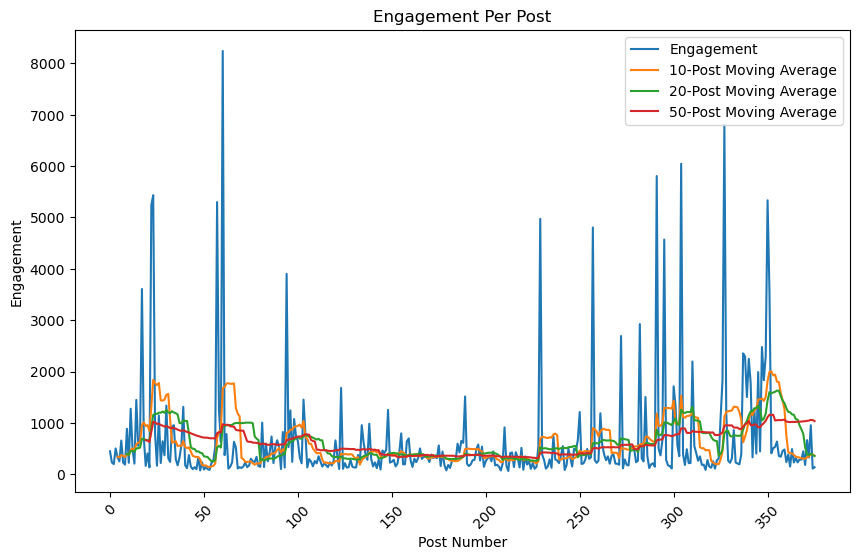

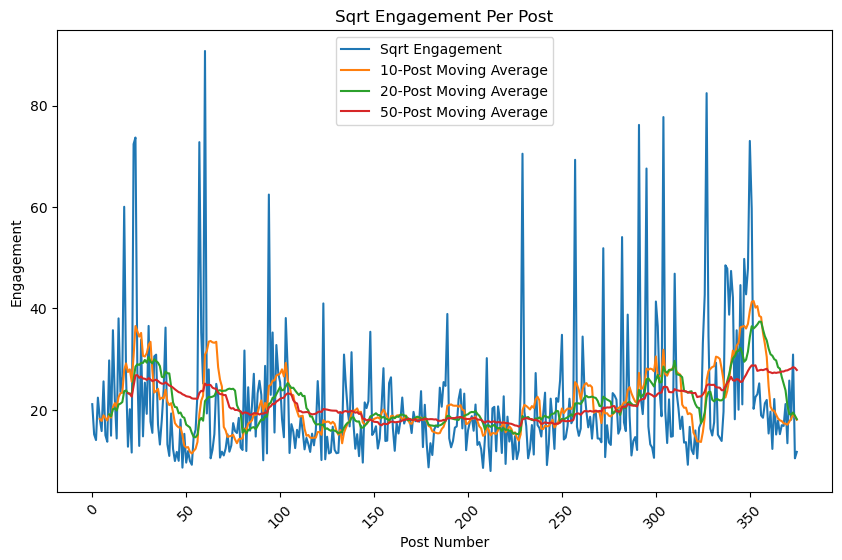

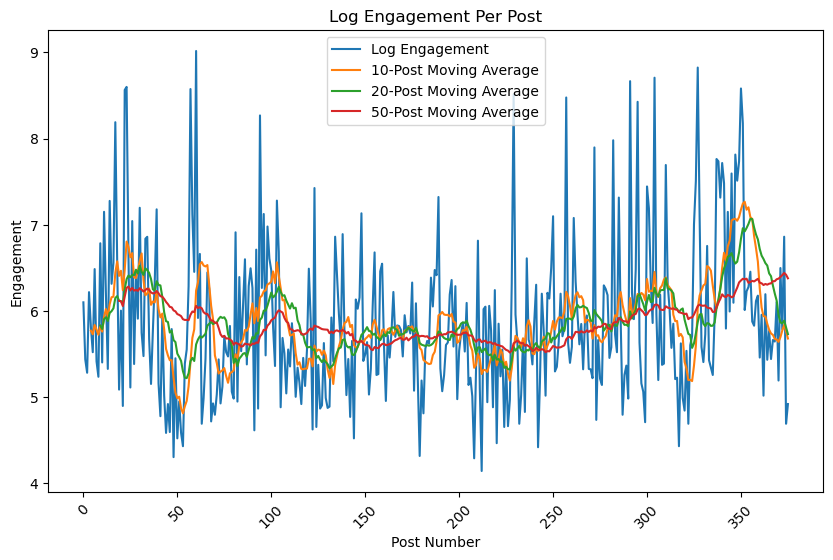

In [29]:
# Engagement per post - no transformation
plt.figure(figsize=(10, 6))
plt.plot(metrics['Engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['10_post_MA'], label='10-Post Moving Average', linestyle='-', marker='')
plt.plot(metrics['20_post_MA'], label='20-Post Moving Average', linestyle='-', marker='')
plt.plot(metrics['50_post_MA'], label='50-Post Moving Average', linestyle='-', marker='')
plt.title('Engagement Per Post')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Engagement per post - square root transformation
plt.figure(figsize=(10, 6))
plt.plot( metrics['sqrt_engagement'], label='Sqrt Engagement', linestyle='-', marker='')
plt.plot(metrics['10_post_MA_sqrt'], label='10-Post Moving Average', linestyle='-', marker='')
plt.plot(metrics['20_post_MA_sqrt'], label='20-Post Moving Average', linestyle='-', marker='')
plt.plot(metrics['50_post_MA_sqrt'], label='50-Post Moving Average', linestyle='-', marker='')
plt.title('Sqrt Engagement Per Post')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Engagement per Post - log transformation
plt.figure(figsize=(10, 6))
plt.plot( metrics['log_engagement'], label='Log Engagement', linestyle='-', marker='')
plt.plot(metrics['10_post_MA_log'], label='10-Post Moving Average', linestyle='-', marker='')
plt.plot(metrics['20_post_MA_log'], label='20-Post Moving Average', linestyle='-', marker='')
plt.plot(metrics['50_post_MA_log'], label='50-Post Moving Average', linestyle='-', marker='')
plt.title('Log Engagement Per Post')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### 2.5 Logarithmic Engagement with Different Stability Ranges

Plotting +-20% stability range, 20 post moving average, log transformation:

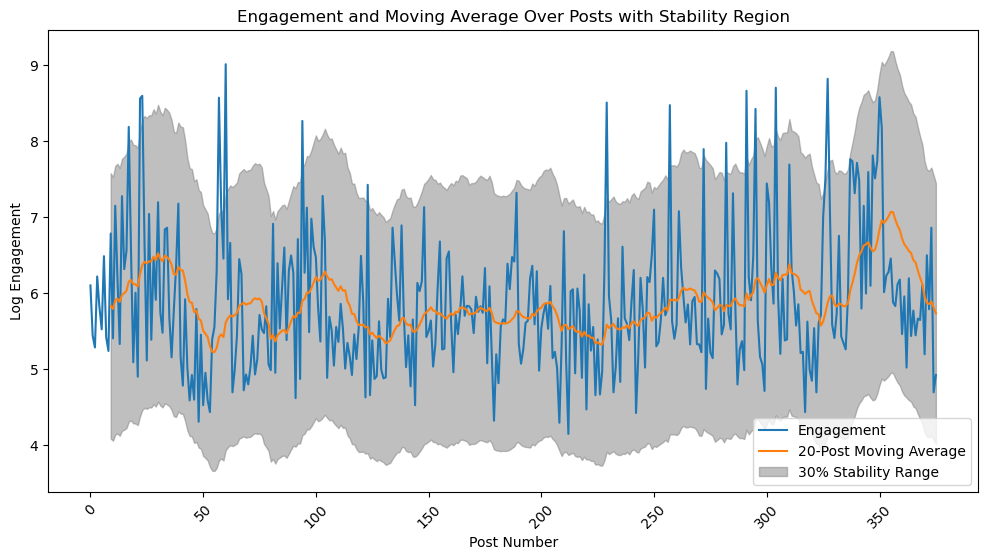

In [30]:
# Calculate the 30% upper and lower bounds
metrics['20_Upper_Bound_log'] = metrics['20_post_MA_log'] * 1.30
metrics['20_Lower_Bound_log'] = metrics['20_post_MA_log'] * 0.70

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['log_engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['20_post_MA_log'], label='20-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['20_Lower_Bound_log'], metrics['20_Upper_Bound_log'], color='gray', alpha=0.5, label='30% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('Log Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Plot +-30% stability range, 50 post moving average, log transformation:

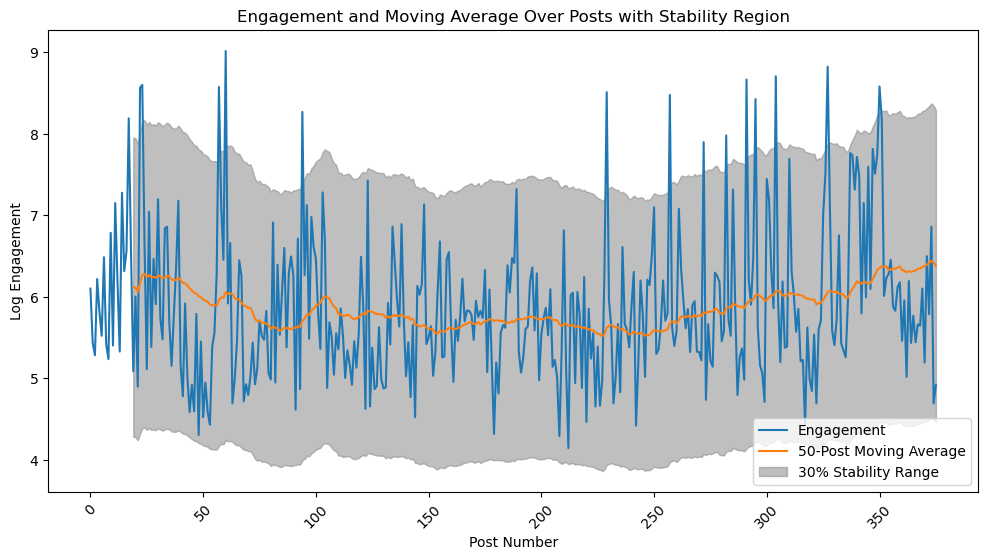

In [31]:
# Calculate the 30% upper and lower bounds
metrics['50_Upper_Bound_log'] = metrics['50_post_MA_log'] * 1.30
metrics['50_Lower_Bound_log'] = metrics['50_post_MA_log'] * 0.70

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['log_engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['50_post_MA_log'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['50_Lower_Bound_log'], metrics['50_Upper_Bound_log'], color='gray', alpha=0.5, label='30% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('Log Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Plot +- 30% stability range, 100 day moving average, log transformation:

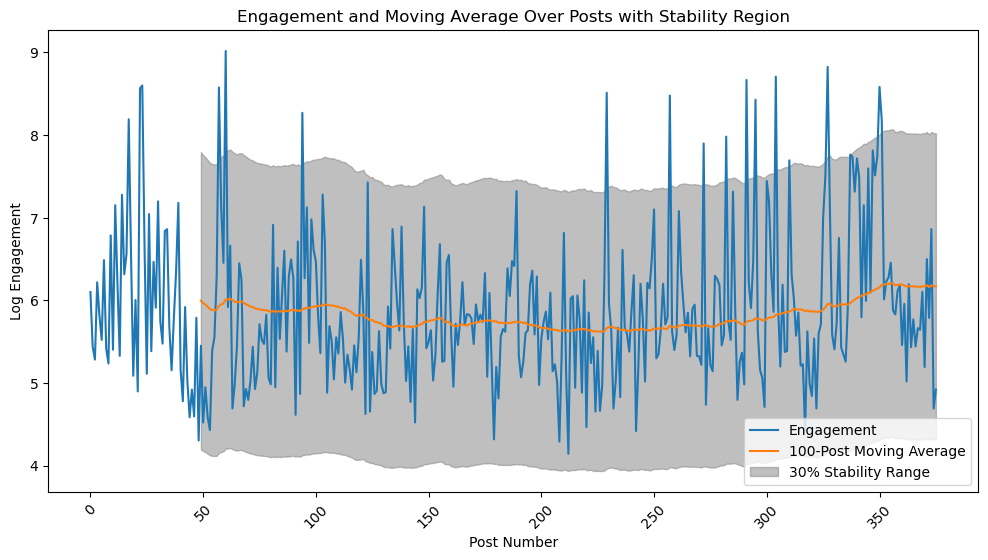

In [32]:
# Calculate the 30% upper and lower bounds
metrics['100_Upper_Bound_log'] = metrics['100_post_MA_log'] * 1.30
metrics['100_Lower_Bound_log'] = metrics['100_post_MA_log'] * 0.70

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['log_engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['100_post_MA_log'], label='100-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['100_Lower_Bound_log'], metrics['100_Upper_Bound_log'], color='gray', alpha=0.5, label='30% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('Log Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Plot +- 30% stability range, 150 post moving average, log transformation:

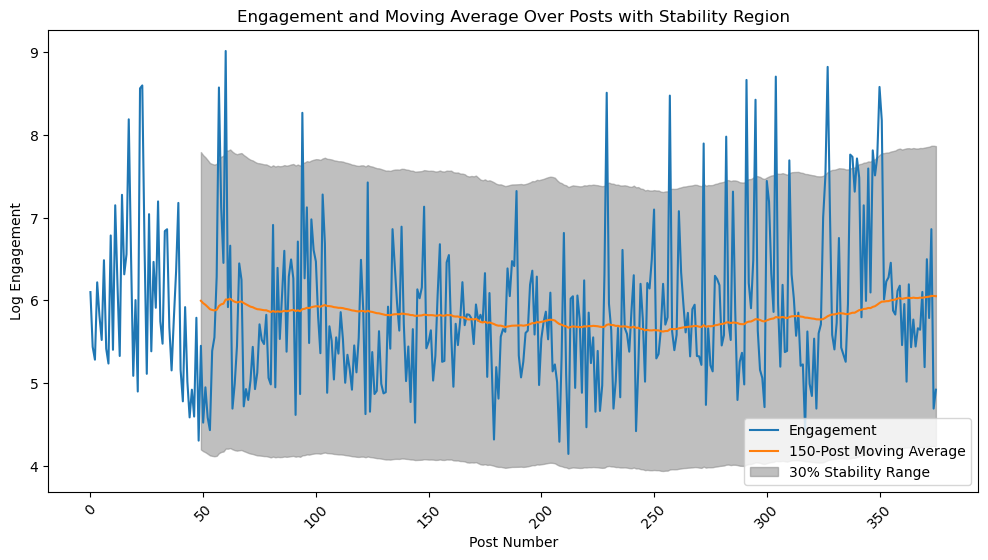

In [33]:
# Calculate the 50% upper and lower bounds
metrics['150_Upper_Bound_log'] = metrics['150_post_MA_log'] * 1.30
metrics['150_Lower_Bound_log'] = metrics['150_post_MA_log'] * 0.70

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['log_engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['150_post_MA_log'], label='150-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['150_Lower_Bound_log'], metrics['150_Upper_Bound_log'], color='gray', alpha=0.5, label='30% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('Log Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### 2.6 Engagement with Different Stability Ranges (SQRT Transformed)

The stability range probably needs to increase because the variability in engagement rates will be higher.

Plotting +-100% stability range, 50 post moving average, square root transformation:

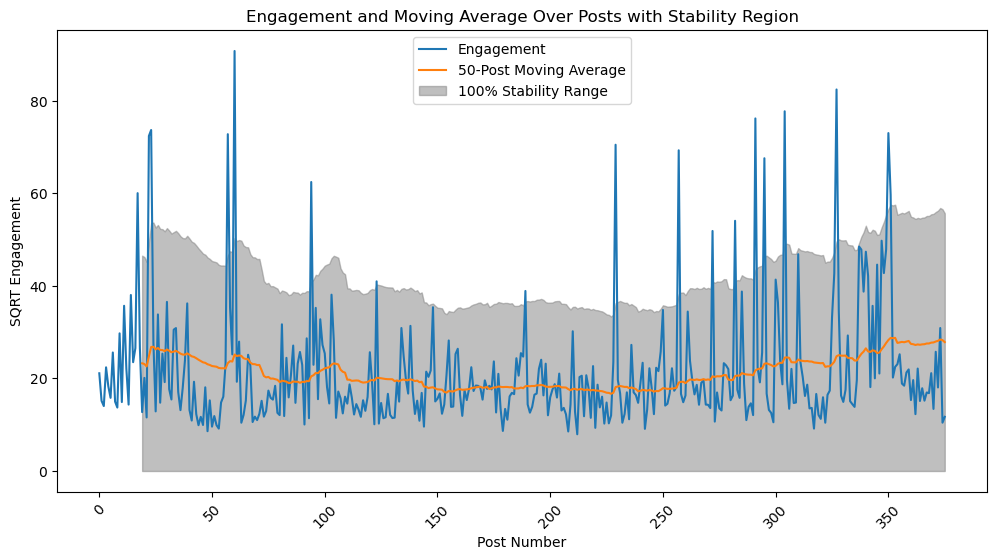

In [34]:
# Calculate the 50% upper and lower bounds
metrics['50_Upper_Bound_sqrt'] = metrics['50_post_MA_sqrt'] * 2.0
metrics['50_Lower_Bound_sqrt'] = metrics['50_post_MA_sqrt'] * 0.00

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['sqrt_engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['50_post_MA_sqrt'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['50_Lower_Bound_sqrt'], metrics['50_Upper_Bound_sqrt'], color='gray', alpha=0.5, label='100% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('SQRT Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Plotting +-100% stability range, 20 post moving average, square root transformation:

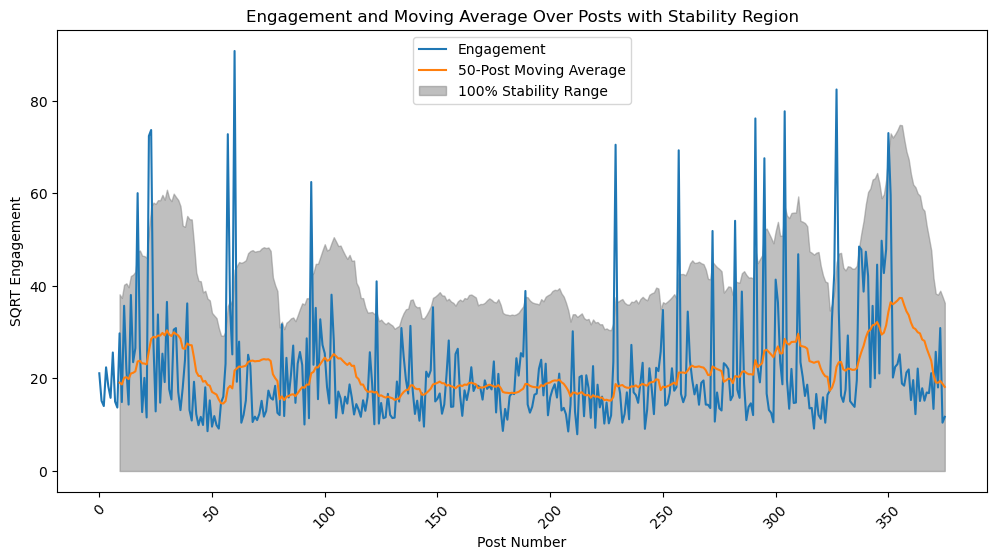

In [35]:
# Calculate the 50% upper and lower bounds
metrics['20_Upper_Bound_sqrt'] = metrics['20_post_MA_sqrt'] * 2.0
metrics['20_Lower_Bound_sqrt'] = metrics['20_post_MA_sqrt'] * 0.00

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['sqrt_engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['20_post_MA_sqrt'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['20_Lower_Bound_sqrt'], metrics['20_Upper_Bound_sqrt'], color='gray', alpha=0.5, label='100% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('SQRT Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### 2.6 Engagement with Different Stability Ranges (Engagement Not Transformed)

Plotting +-100% stability range, 50 post moving average, no transformation:

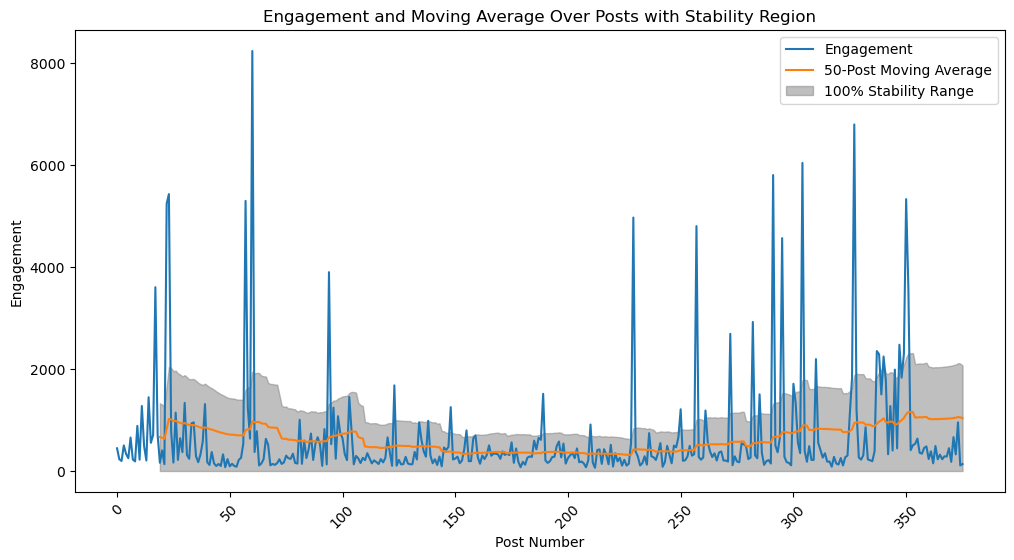

In [36]:
# Calculate the 50% upper and lower bounds
metrics['50_Upper_Bound_nonlog'] = metrics['50_post_MA'] * 2.0
metrics['50_Lower_Bound_nonlog'] = metrics['50_post_MA'] * 0.00

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(metrics['Engagement'], label='Engagement', linestyle='-', marker='')
plt.plot(metrics['50_post_MA'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(metrics.index, metrics['50_Lower_Bound_nonlog'], metrics['50_Upper_Bound_nonlog'], color='gray', alpha=0.5, label='100% Stability Range')

# Customizing the plot
plt.title('Engagement and Moving Average Over Posts with Stability Region')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Note: The larger the time frame used to calculate the moving average, the longer the timeframe should be to determine the baseline level. A baseline can't be determined from 10 posts after a viral post if using a 150 day moving average. 

________

_____

#### 2.7 Method: Standard Deviation Defined Baseline and Virality

**Virality**: Over 3 standard deviations from the mean.

**Baseline**: Within 2 standard deviations of the mean for n consecutive .

Method 1:
Log Transformed
Virality = Over 3SD
Baseline = Under 3SD

Method 2:
Log Transformed
Virality = Over 3SD
Baseline = Under 2SD

Method 3:
SQRT Transformed
Virality = Over 3SD
Baseline = Under 3SD

Method 4:
SQRT Transformed
Virality = Over 3SD
Baseline = Under 2SD 


In [146]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [147]:
b_method4 = orig_data.copy()
b_method4['log_engagement'] = np.log(b_method4['Engagement'])
b_method4['sqrt_engagement'] = np.sqrt(b_method4['Engagement'])

In [148]:
b_method4['log_mean'] = b_method4['log_engagement'].mean()
b_method4['log_stdev'] = b_method4['log_engagement'].std()
b_method4['sqrt_mean'] = b_method4['sqrt_engagement'].mean()
b_method4['sqrt_stdev'] = b_method4['sqrt_engagement'].std()
b_method4['sqrt_median'] = b_method4['sqrt_engagement'].median()
b_method4['sqrt_mad'] = (b_method4['sqrt_engagement'] - b_method4['sqrt_engagement'].median()).abs().mean()


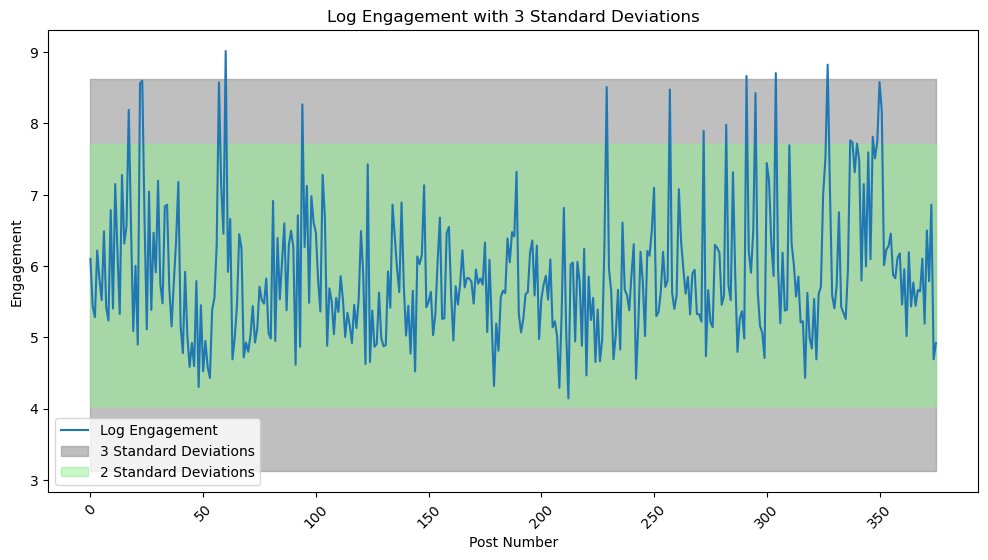

In [149]:
b_method4['3sd_upper_log'] = b_method4['log_mean'] + b_method4['log_stdev']*3
b_method4['3sd_lower_log'] = b_method4['log_mean'] - b_method4['log_stdev']*3
b_method4['2sd_upper_log'] = b_method4['log_mean'] + b_method4['log_stdev']*2
b_method4['2sd_lower_log'] = b_method4['log_mean'] - b_method4['log_stdev']*2

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(b_method4['log_engagement'], label='Log Engagement', linestyle='-', marker='')
#plt.plot(metrics['50_post_MA'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(b_method4.index, b_method4['3sd_lower_log'], b_method4['3sd_upper_log'] , color='gray', alpha=0.5, label='3 Standard Deviations')
# Add shaded area
plt.fill_between(b_method4.index, b_method4['2sd_lower_log'], b_method4['2sd_upper_log'] , color='lightgreen', alpha=0.5, label='2 Standard Deviations')

# Customizing the plot
plt.title('Log Engagement with 3 Standard Deviations')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Use Z-Score to normalize engagement across all companies. 

**X-Axis**: Post Number

**Y-Axis**: Standard Deviaition of Square Root Engagement 

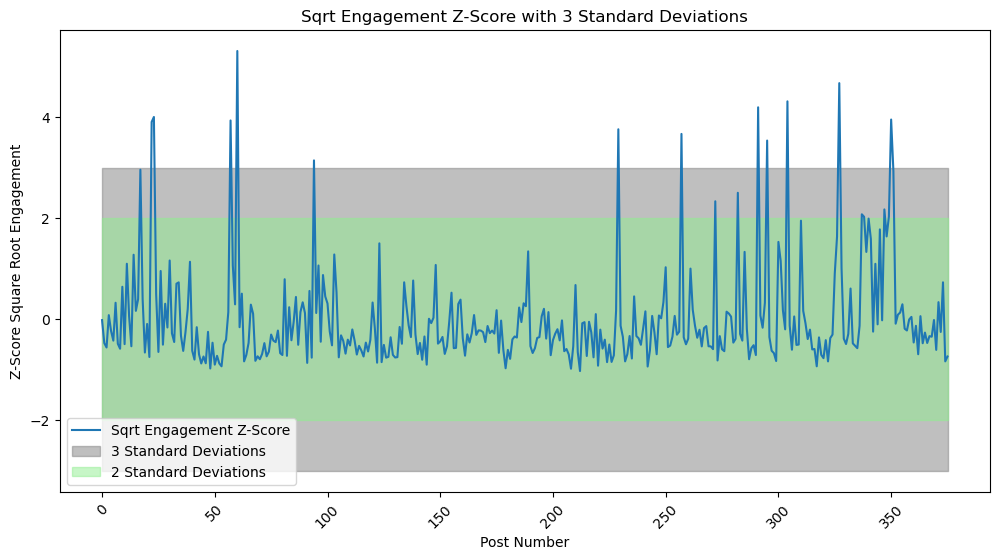

In [150]:
# Normalize sqrt_engagement by its own mean and standard deviation
b_method4['sqrt_engagement_zscore'] = (b_method4['sqrt_engagement'] - b_method4['sqrt_engagement'].mean()) / b_method4['sqrt_engagement'].std()
b_method4['z_score_mean'] = b_method4['sqrt_engagement_zscore'].mean()
b_method4['z_score_std'] = b_method4['sqrt_engagement_zscore'].std()

b_method4['3sd_upper_sqrt'] = b_method4['z_score_mean'] + b_method4['z_score_std']*3
b_method4['3sd_lower_sqrt'] = b_method4['z_score_mean'] - b_method4['z_score_std']*3
b_method4['2sd_upper_sqrt'] = b_method4['z_score_mean'] + b_method4['z_score_std']*2
b_method4['2sd_lower_sqrt'] = b_method4['z_score_mean'] - b_method4['z_score_std']*2

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(b_method4['sqrt_engagement_zscore'], label='Sqrt Engagement Z-Score', linestyle='-', marker='')
#plt.plot(metrics['50_post_MA'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(b_method4.index, b_method4['3sd_lower_sqrt'], b_method4['3sd_upper_sqrt'] , color='gray', alpha=0.5, label='3 Standard Deviations')
# Add shaded area
plt.fill_between(b_method4.index, b_method4['2sd_lower_sqrt'], b_method4['2sd_upper_sqrt'] , color='lightgreen', alpha=0.5, label='2 Standard Deviations')

# Customizing the plot
plt.title('Sqrt Engagement Z-Score with 3 Standard Deviations')
plt.xlabel('Post Number')
plt.ylabel('Z-Score Square Root Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
b_method4['Z_score_transformation'] = 

b_method4['3sd_upper_sqrt'] = b_method4['sqrt_mean'] + b_method4['sqrt_stdev']*3
b_method4['3sd_lower_sqrt'] = b_method4['sqrt_mean'] - b_method4['sqrt_stdev']*3
b_method4['2sd_upper_sqrt'] = b_method4['sqrt_mean'] + b_method4['sqrt_stdev']*2
b_method4['2sd_lower_sqrt'] = b_method4['sqrt_mean'] - b_method4['sqrt_stdev']*2

# Plot engagement and moving average
plt.figure(figsize=(12, 6))
plt.plot(b_method4['sqrt_engagement'], label='Sqrt Engagement', linestyle='-', marker='')
#plt.plot(metrics['50_post_MA'], label='50-Post Moving Average', linestyle='-', marker='')

# Add shaded area
plt.fill_between(b_method4.index, b_method4['3sd_lower_sqrt'], b_method4['3sd_upper_sqrt'] , color='gray', alpha=0.5, label='3 Standard Deviations')
# Add shaded area
plt.fill_between(b_method4.index, b_method4['2sd_lower_sqrt'], b_method4['2sd_upper_sqrt'] , color='lightgreen', alpha=0.5, label='2 Standard Deviations')

# Customizing the plot
plt.title('Sqrt Engagement with 3 Standard Deviations')
plt.xlabel('Post Number')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Method 1:
Log Transformed
Virality = Over 3SD
Baseline = Under 3SD

Method 2:
Log Transformed
Virality = Over 3SD
Baseline = Under 2SD

Method 3:
SQRT Transformed
Virality = Over 3SD
Baseline = Under 3SD

Method 4:
SQRT Transformed
Virality = Over 3SD
Baseline = Under 2SD 


In [42]:

# Binary indicators for engagement relative to standard deviation thresholds
b_method4['log_over_3SD'] = b_method4['log_engagement'] >= b_method4['3sd_upper_log']
b_method4['log_under_3SD'] = b_method4['log_engagement'] <= b_method4['3sd_upper_log']
b_method4['log_under_2SD'] = b_method4['log_engagement'] <= b_method4['2sd_upper_log']
b_method4['sqrt_over_3SD'] = b_method4['sqrt_engagement'] >= b_method4['3sd_upper_sqrt']
b_method4['sqrt_under_3SD'] = b_method4['sqrt_engagement'] <= b_method4['3sd_upper_sqrt']
b_method4['sqrt_under_2SD'] = b_method4['sqrt_engagement'] <= b_method4['2sd_upper_sqrt']
